# Text Data - Sentiment Analysis

## Dataset - Click here to download the dataset :
### https://drive.google.com/file/d/1Y0QGzCYvQxlgv83Ojmr9kmLGrlg98o6P/view

## Data Description
- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Data includes:
- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
- 256,059 Users and 74,258 products
- 260 users with > 50 reviews

## Below attached is the screenshot of product review from Amazon Website.

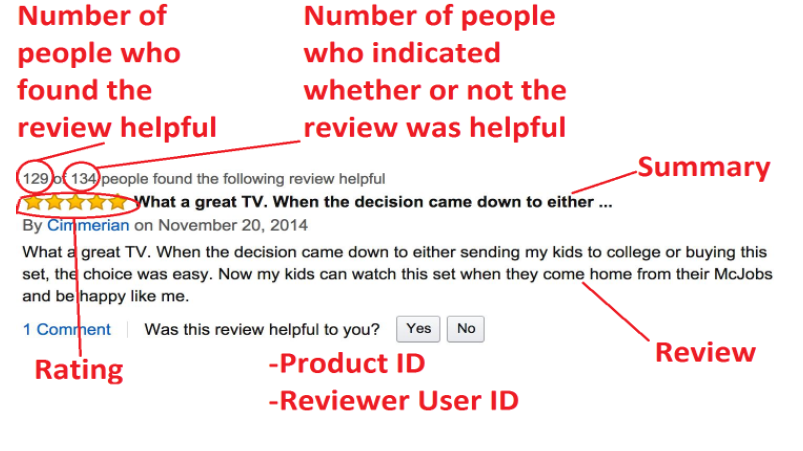

### Task - Your task here is to use your Data Engineering skills to transform the given data(i.e. Text files) to tabular format(i.e. csv file). The columns in this .csv file should be:
- Id - Unique row number
- ProductId - Unique identifier for the product
- UserId - Unique identifier for the user
- ProfileName
- HelpfulnessNumerator - Number of users who found the review helpful
- HelpfulnessDenominator - Number of users who indicated whether they found the review helpful
- Score - Rating between 1 and 5
- Time - Timestamp for the review
- ReviewSummary - Brief summary of the review
- ReviewText - Text of the review
-  NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator


## Problem statement:
- ### GivenvariousfeatureslikeHelpfulnessNumerator,HelpfulnessDenominator,ReviewSummary,ReviewText etc.. , predict Score of a given text Review

### Unzip the given data:

In [ ]:
! unzip '/content/drive/MyDrive/Colab Notebooks/txt_reviews.zip' -d '/content/text'

## converting text files to dataframe

In [ ]:
file_names = os.listdir('/content/text/txt_reviews')

print('Total number of files in the dataset:', len(file_names))

In [ ]:
ProductId = []
UserId = []
ProfileName=[]
HelpfulnessNumerator=[]
HelpfulnessDenominator=[]
Score=[]
Time=[]
ReviewSummary=[]
ReviewText=[]
for file in file_names:
    with open('/content/text/txt_reviews/'+file, 'r') as f:
        lines = f.readlines()
        ProductId.append(lines[0])
        UserId.append(lines[1])
        ProfileName.append(lines[2])
        HelpfulnessNumerator.append(lines[3])
        HelpfulnessDenominator.append(lines[4])
        Score.append(lines[5])
        Time.append(lines[6])
        ReviewSummary.append(lines[7])
        ReviewText.append(lines[8])
        
df = pd.DataFrame({'ProductId':ProductId,'UserId':UserId,'ProfileName':ProfileName,'HelpfulnessNumerator':HelpfulnessNumerator,
                   'HelpfulnessDenominator':HelpfulnessDenominator,'Score':Score,'Time':Time,'ReviewSummary':ReviewSummary,
                   'ReviewText':ReviewText})


### Import the required Libraries

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

In [ ]:
text=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/txt_rev.csv')
text.drop(text.filter(regex="Unnamed"),axis=1, inplace=True)

In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568173 entries, 0 to 568172
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568173 non-null  object
 1   UserId                  568173 non-null  object
 2   ProfileName             568173 non-null  object
 3   HelpfulnessNumerator    568173 non-null  int64 
 4   HelpfulnessDenominator  568173 non-null  int64 
 5   Score                   568173 non-null  int64 
 6   Time                    568173 non-null  object
 7   ReviewSummary           568173 non-null  object
 8   ReviewText              568173 non-null  object
 9   Helpfulness             568173 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 43.3+ MB


## cleaning data

In [ ]:
text['ProductId']=text['ProductId'].apply(lambda x:x.strip('ProductId:'))
text['ProductId']=text['ProductId'].apply(lambda x:x.strip('\n'))
text['UserId']=text['UserId'].apply(lambda x:x.strip('UserId:'))
text['UserId']=text['UserId'].apply(lambda x:x.strip('\n'))

text['ProfileName']=text['ProfileName'].apply(lambda x:x.strip('ProfileName:'))
text['ProfileName']=text['ProfileName'].apply(lambda x:x.strip('\n'))

text['HelpfulnessNumerator']=text['HelpfulnessNumerator'].apply(lambda x:x.strip('HelpfulnessNumerator:'))
text['HelpfulnessNumerator']=text['HelpfulnessNumerator'].apply(lambda x:x.strip('\n'))

text['HelpfulnessDenominator']=text['HelpfulnessDenominator'].apply(lambda x:x.strip('HelpfulnessDenominator:'))
text['HelpfulnessDenominator']=text['HelpfulnessDenominator'].apply(lambda x:x.strip('\n'))

text['Score']=text['Score'].apply(lambda x:x.strip('Score:'))
text['Score']=text['Score'].apply(lambda x:x.strip('\n'))

text['Time']=text['Time'].apply(lambda x:x.strip('Time:'))
text['Time']=text['Time'].apply(lambda x:x.strip('\n'))

text['ReviewSummary']=text['ReviewSummary'].apply(lambda x:x.strip('ReviewSummary:'))
text['ReviewSummary']=text['ReviewSummary'].apply(lambda x:x.strip('\n'))

text['ReviewText']=text['ReviewText'].apply(lambda x:x.strip('ReviewSummary:'))
text['ReviewText']=text['ReviewText'].apply(lambda x:x.strip('\n'))


## Removing_duplicates

In [ ]:
text.duplicated().sum()

0

In [ ]:
text.drop_duplicates(inplace=True)

## null values:

In [ ]:
text.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
Helpfulness               0
dtype: int64

## Type conversions

In [ ]:
text['Time']=text['Time'].astype('int')

text['Time'] = text['Time'].apply(lambda x: datetime.fromtimestamp(x).isoformat())

text['Time'] = text['Time'].apply(lambda x: ''.join(re.findall('(.*)T',x)))

text['Time'] = pd.to_datetime(text['Time'])

## Adding Helpflness

In [ ]:
text['HelpfulnessDenominator']=text['HelpfulnessDenominator'].astype(int)
text['HelpfulnessNumerator']=text['HelpfulnessNumerator'].astype(int)
text['Score']=text['Score'].astype(int)

text['Helpfulness'] = text['HelpfulnessNumerator']/text['HelpfulnessDenominator']*100

text['Helpfulness'] = text['Helpfulness'].fillna(0)

text['Helpfulness'] = text['Helpfulness'].astype(int)

### converting to csv

In [ ]:
text.to_csv('/content/drive/MyDrive/Colab Notebooks/txt_rev.csv')

In [ ]:
text.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B002YLGA0W,ATLP39IAQU6MN,Ronnie S.,2,2,3,2011-06-04,Good but there's so much of it!!!,"Text: The taste of this corn is fine. However,...",100
1,B0025WGHEE,A1R7I9VX8M5Y3V,"Neil S. Majd ""Neil""",1,2,5,2010-07-22,EXCELLENT!,Text: This is a great product. You can make yo...,50
2,B0029I6PJ6,A3KNVED193ME7,ben,0,0,5,2012-08-25,1000 times better than normal,"Text: this is an incredibly good soda, and is ...",0
3,B000OH57ZW,A24PZR4W555WQI,D. Saldarriaga,0,0,5,2011-01-10,My dogs love Wellness,Text: My dogs and I love this food. They never...,0
4,B0048IFP3W,A166KL32BGCSB0,Randy Haldeman,1,1,5,2012-01-31,Nectar of the gods,Text: I've been drinking one Guayaki Herba Mat...,100


In [ ]:
text.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
568168,B002IEZJMA,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",1,3,1,2012-06-23,Not impressed! Just regular strong black coff...,"Text: I love coffee of all kinds and flavors, ...",33
568169,B001AWBL82,A1Y6WOT2KH3J5D,E. Scott Scrivner,5,5,4,2009-10-24,King B Jerky Strips Found!,"Text: With Jack Links buying King B, it looks ...",100
568170,B001D0IZ80,A1R0641DRBD5N3,S. Levine,1,1,5,2009-08-17,"very smooth, great tasting cup of coffee",Text: I really enjoy this coffee. I brew it o...,100
568171,B001BDDTB2,A1S8FJT0AQSF60,C. Williamson,1,1,4,2008-11-29,"Delicious, says my cat; messy, says I...",Text: It's a cute idea to produce a cat food t...,100
568172,B000EDHXO4,A1Z6B3WUY2B2D8,"Paul C. Laughton ""X""",0,0,5,2010-10-12,A great flavor for meats of all types,"Text: I use this spice for all my Chicken, Bee...",0


In [ ]:
text['Helpfulness'].value_counts()

0      303600
100    183271
50      21623
66      10514
75       6390
        ...  
24          7
150         1
300         1
49          1
1           1
Name: Helpfulness, Length: 103, dtype: int64

In [ ]:
text.sort_values(['Time'], ascending=True, inplace=True)
text.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
371527,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,1999-10-08,EVERY book is educational,Text: this witty little book makes my son laug...,0
296307,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,1999-10-25,This whole series is great way to spend time ...,Text: I can remember seeing the show when it a...,100
518759,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,1999-12-02,Entertainingl Funny!,Text: Beetlejuice is a well written movie .......,0
336160,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50
62085,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50


In [ ]:
#Dropping the unwanted columns from our data frame.
text.drop("ProductId", inplace=True, axis=1)
text.drop("ProfileName", inplace=True, axis=1)
text.drop("HelpfulnessNumerator", inplace=True, axis=1)
text.drop("HelpfulnessDenominator", inplace=True, axis=1)
text.drop("Time", inplace=True, axis=1)
text.head()

,UserId,Score,ReviewSummary,ReviewText,Helpfulness
371527,ACITT7DI6IDDL,5,EVERY book is educational,Text: this witty little book makes my son laug...,0
296307,AJ46FKXOVC7NR,5,This whole series is great way to spend time ...,Text: I can remember seeing the show when it a...,100
518759,AIUWLEQ1ADEG5,5,Entertainingl Funny!,Text: Beetlejuice is a well written movie .......,0
336160,A344SMIA5JECGM,5,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50
62085,A344SMIA5JECGM,5,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50


In [ ]:
#Make all 'Score' less than 3 equal to -ve class and 
# 'Score' greater than 3 equal to +ve class.
text.loc[text['Score']<3, 'Score'] = 0
text.loc[text['Score']>3, 'Score'] = 1

In [ ]:
text.head()

,UserId,Score,ReviewSummary,ReviewText,Helpfulness
371527,ACITT7DI6IDDL,1,EVERY book is educational,Text: this witty little book makes my son laug...,0
296307,AJ46FKXOVC7NR,1,This whole series is great way to spend time ...,Text: I can remember seeing the show when it a...,100
518759,AIUWLEQ1ADEG5,1,Entertainingl Funny!,Text: Beetlejuice is a well written movie .......,0
336160,A344SMIA5JECGM,1,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50
62085,A344SMIA5JECGM,1,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50


In [ ]:
# Removing all rows where 'Score' is equal to 3
text=text[text['Score']!=3]

## Step - 2: Document the below mentioned points properly:
- Inputvariable:ReviewText
- Target variable:Score
- Type:Supervised Learning(since target variable is given).
- Task:classification
- Identify the Evaluation Metric.
- classification task: Accuracy

In [ ]:
from pandas.core.common import random_state
X=text[['ReviewText']]
y=text[['Score']]

### Split the dataset into Training and Testing (recommended 80:20 split).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##  Data preparation on train data:
- Data Cleaning
- Data Transformations

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
from tqdm import tqdm,tqdm_notebook

In [ ]:
tqdm.pandas()

In [ ]:
temp_df= X_train['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df.head()

100%|██████████| 420447/420447 [1:36:03<00:00, 72.95it/s]


,clean_text_lemma,text_length_lemma
361453,text use yorkshire loose tea time brewing pot ...,44
488099,text peppermint specie mentha arvensis true pe...,14
101537,text pit bull love chew toy suprising lasted m...,38
136788,text made dip minute easy even toddler wanting...,15
321796,text buying kind bar year must say every bar w...,29


In [ ]:
tempdf=temp_df.to_csv('X_train_Review_Text_0')

In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/X_train_Review_Text_0')
X_train.drop(X_train.filter(regex="Unnamed"),axis=1, inplace=True)
X_train.head()

,clean_text_lemma,text_length_lemma
0,text use yorkshire loose tea time brewing pot ...,44
1,text peppermint specie mentha arvensis true pe...,14
2,text pit bull love chew toy suprising lasted m...,38
3,text made dip minute easy even toddler wanting...,15
4,text buying kind bar year must say every bar w...,29


In [ ]:
temp_df1= X_test['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df1.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df1.head()

100%|██████████| 105112/105112 [24:19<00:00, 72.03it/s]


,clean_text_lemma,text_length_lemma
33044,text product repels mosquito well enough keep ...,30
562537,text love caribou coffee convience k cup easy ...,12
243913,text one favorite snack realize may among mass...,34
45041,text sent candy daughter easter gift something...,22
329704,text awesome deal love strong cup coffee best ...,19


In [ ]:
temp_df1.to_csv('X_test_Review_Text_0')

In [ ]:
X_test=pd.read_csv('/content/drive/MyDrive/X_test_Review_Text_0')
X_test.drop(X_test.filter(regex="Unnamed"),axis=1, inplace=True)
X_test.head()

,clean_text_lemma,text_length_lemma
0,text product repels mosquito well enough keep ...,30
1,text love caribou coffee convience k cup easy ...,12
2,text one favorite snack realize may among mass...,34
3,text sent candy daughter easter gift something...,22
4,text awesome deal love strong cup coffee best ...,19


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [ ]:
X_train_bow

<420447x89464 sparse matrix of type '<class 'numpy.int64'>'
	with 14096579 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 89464
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (420447, 89464)


In [ ]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 89464
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (105112, 89464)


In [ ]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

## Training Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_bow, y_train)
y_test_pred = regressor.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9356210518304285


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Training KNN classification:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classification=KNeighborsClassifier()
KNN_classification.fit(X_train_bow,y_train)
y_test_pred=KNN_classification.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8838286779815816


## Training-Decision Tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classification=DecisionTreeClassifier()
DT_classification.fit(X_train_bow,y_train)
y_test_pred=DT_classification.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.9126360453611386


## Ensemble
### Training-Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_classification=RandomForestClassifier()
Random_classification.fit(X_train_bow,y_train)
y_test_pred=Random_classification.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

<ipython-input-31-662ec2e7b094>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_classification.fit(X_train_bow,y_train)


0.9276676307177106


## Training-Adaboost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA_classification=AdaBoostClassifier()
ADA_classification.fit(X_train_bow,y_train)
y_test_pred=ADA_classification.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8796807215160971


## Training-Gradiant boost decision tree classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT_classification=GradientBoostingClassifier()
GBDT_classification.fit(X_train_bow,y_train)
y_test_pred=GBDT_classification.predict(X_test_bow)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8749238907070553


In [7]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value =rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            
        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [ ]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,"Precision_score":Precision_score,
                      "F1_score":F1_score,"Roc_Auc_Score":Roc_Auc_Score},index=Algorithm)


In [ ]:
overview

,Accuracy_score,Precision_score,F1_score,Roc_Auc_Score
DecisionTreeClassifier,0.912636,0.944170,0.948477,0.824061
AdaBoostClassifier,0.879681,0.892485,0.931861,0.669873
GradientBoostingClassifier,0.874924,0.874499,0.930657,0.611325
RandomForestClassifier,0.927668,0.922269,0.958846,0.771672
LogisticRegression,0.935621,0.950201,0.962346,0.849257


In [ ]:
Algorithm

['DecisionTreeClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'RandomForestClassifier',
 'LogisticRegression']

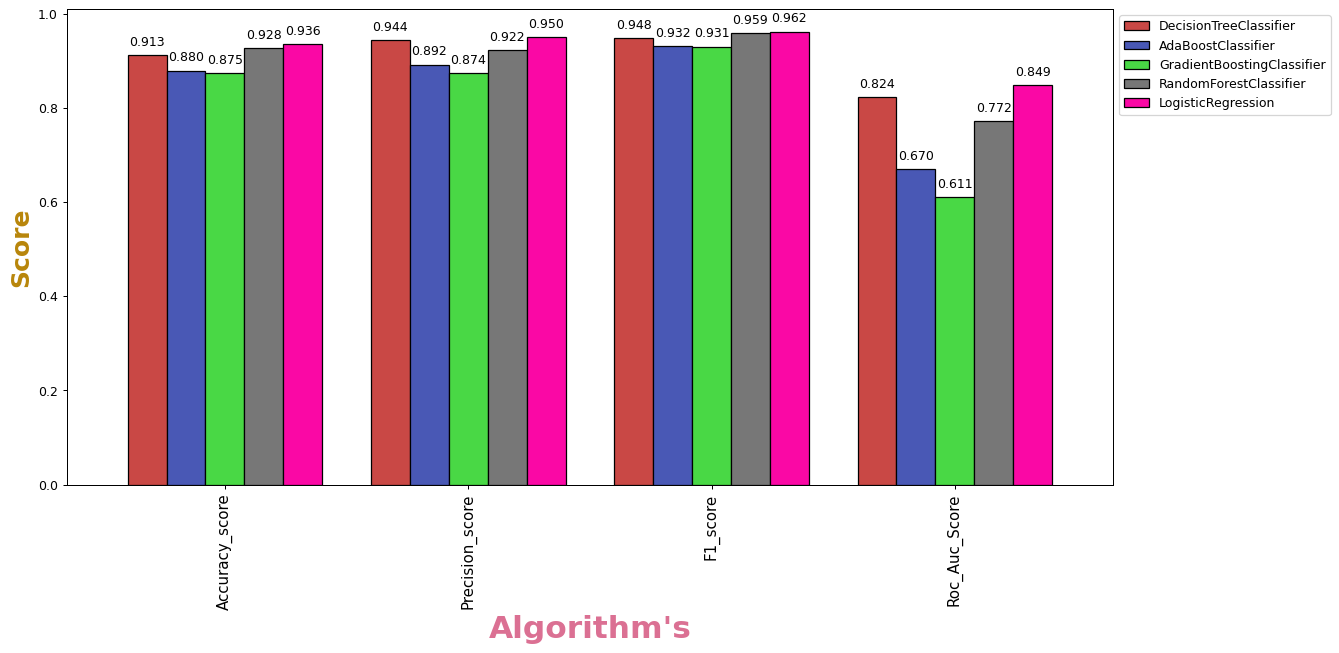

In [ ]:
fig,axes=plt.subplots(figsize=(15,7),dpi=90)
ax=overview.T.plot(ax=axes,kind='bar',width=0.8,align='center',alpha=1.0,color=['#C94845', '#4958B5', '#49D845', '#777777','#FA08A5'],edgecolor='black')
add_value_labels(ax)
ax.set_xlabel("Algorithm's",fontsize=25,fontweight='bold',color='palevioletred')
ax.set_ylabel("Score",fontsize=20,fontweight='bold',color='darkgoldenrod')
plt.xticks(rotation=90,fontsize='large')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize=12);

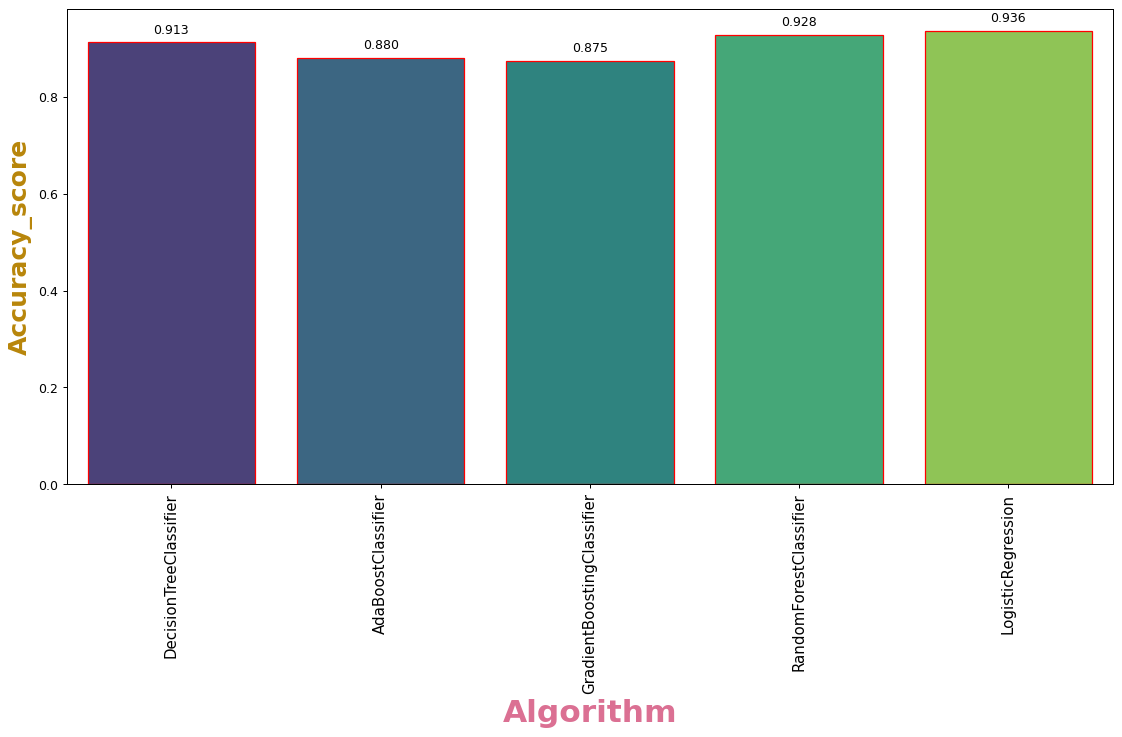

In [ ]:
plt.figure(figsize=(15,7),dpi=90)
ax=sns.barplot(x=overview.index,y='Accuracy_score',data=overview,palette='viridis',edgecolor='red')
add_value_labels(ax)
ax.set_xlabel('Algorithm',fontsize=25,fontweight='bold',color='palevioletred')
ax.set_ylabel('Accuracy_score',fontsize=20,fontweight='bold',color='darkgoldenrod')
plt.xticks(rotation=90,fontsize='large')
plt.xlabel('Algorithm')
plt.show()

# $\color{red}{\text{Conclusion:}}$
## Using Evalution matrix(Accuracy_Score,Precission_Score,F1_score,Roc_Auc_Score)
- ### LogisticRegression algorithm is the best model for Score of a given text Review.
- ### Becuase LogisticRegression Acuuracy_score is more compare to other models.

## Exploratory Data Analysis

In [ ]:
text

,UserId,Score,ReviewSummary,ReviewText,Helpfulness
371527,ACITT7DI6IDDL,1,EVERY book is educational,Text: this witty little book makes my son laug...,0
296307,AJ46FKXOVC7NR,1,This whole series is great way to spend time ...,Text: I can remember seeing the show when it a...,100
518759,AIUWLEQ1ADEG5,1,Entertainingl Funny!,Text: Beetlejuice is a well written movie .......,0
336160,A344SMIA5JECGM,1,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50
62085,A344SMIA5JECGM,1,A modern day fairy tale,Text: A twist of rumplestiskin captured on fil...,50
...,...,...,...,...,...
539479,A382JIHUMW9B63,1,Best Ice tea we've had!,Text: We go to a local mom and pops Italian re...,0
424321,A3464G00K8ZYD1,1,Great Tasting Double-Chocolate Cookie,Text: The Chips Ahoy! Chewy Gooey Megafudge co...,0
363457,A2L3AP3898XNDI,1,Great stuff,Text: A co-worker recommended that I try Cocon...,0
199471,A3SSEJ8IEM4YGW,1,Dogs love it.,"Text: This is the ""all gone"" treat after dinne...",0


In [19]:
text=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/txt_rev.csv')
text.drop(text.filter(regex="Unnamed"),axis=1, inplace=True)

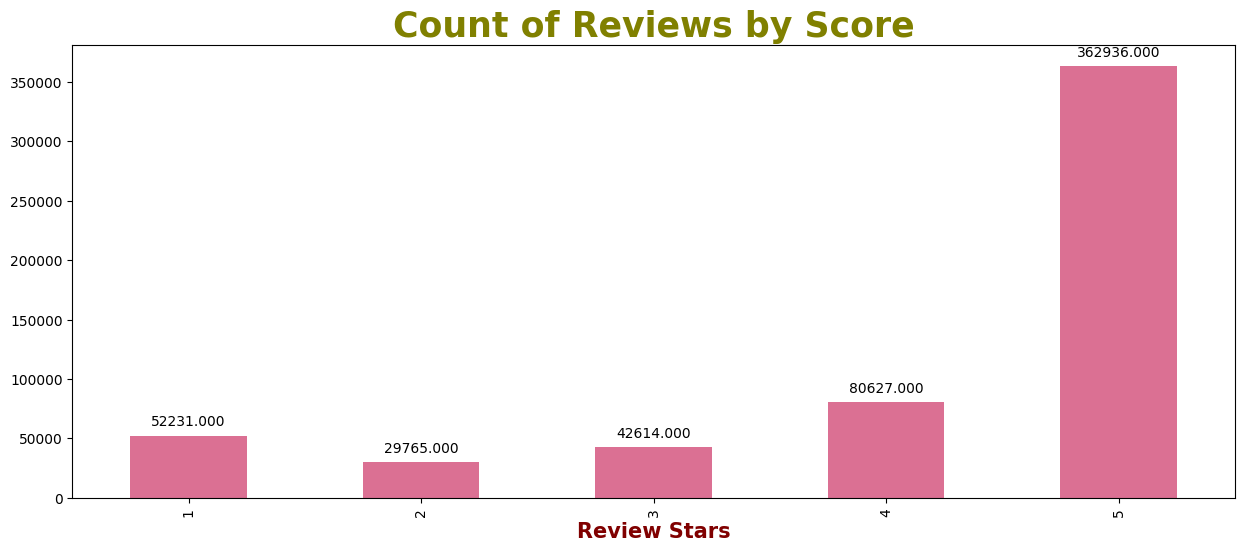

In [13]:
plt.figure(figsize=(15,15),dpi=100)
ax = text['Score'].value_counts().sort_index() .plot(kind='bar',figsize=(15, 6),color='palevioletred')
ax.set_xlabel('Review Stars',fontsize=15,fontweight='bold',color='maroon')
ax.set_title('Count of Reviews by Score',fontsize=25,fontweight='bold',color='olive')
add_value_labels(ax)
plt.show()

In [25]:
text["Sentiment"] = text["Score"].apply(lambda score: "positive" if score >= 3 else ("negative" if score < 3 else "not defined"))

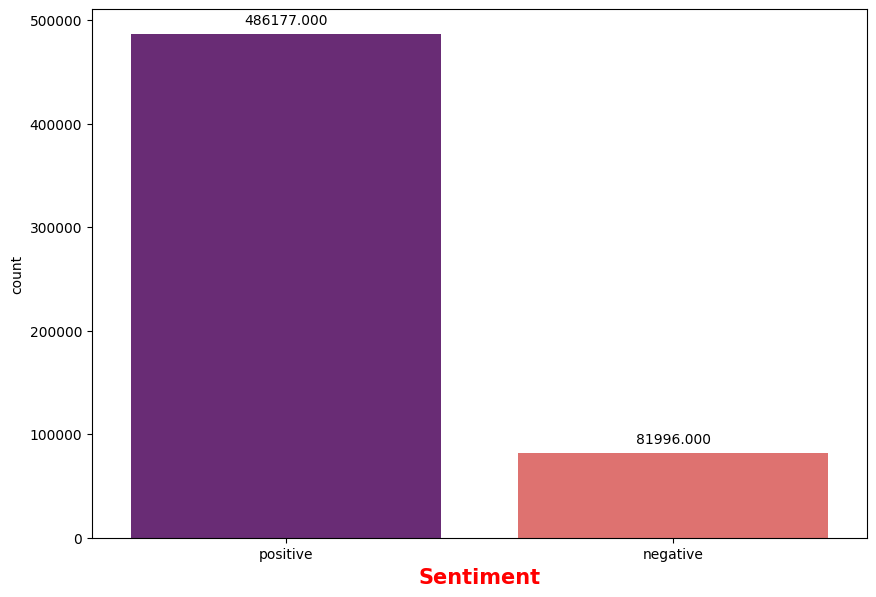

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
ax=sns.countplot(x='Sentiment', order=["positive", "negative"], data=text,palette='magma')
ax.set_xlabel('Sentiment',fontsize=15,fontweight='bold',color='red')
plt.xlabel('Sentiment')
add_value_labels(ax)
plt.show()

In [26]:
text["Usefulness"] = (text['Helpfulness']).apply(lambda n: ">75%" if n > 75 else ("<25%" if n <25 else ("25-75%" if n >= 25 and n <= 75 else "useless")))

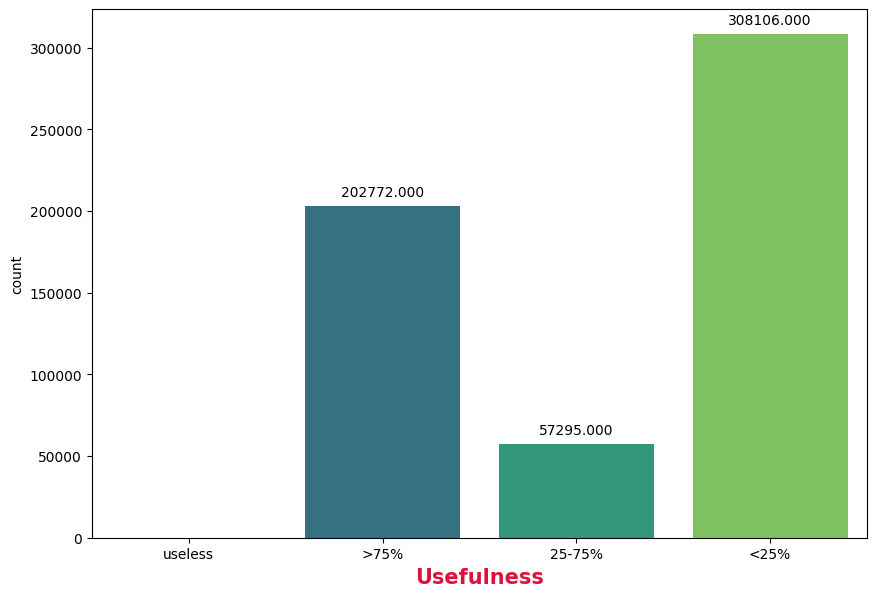

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
ax=sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=text,palette="viridis")
ax.set_xlabel('Usefulness',fontsize=15,fontweight='bold',color='crimson')
plt.xlabel('Usefulness')
add_value_labels(ax)
plt.show()

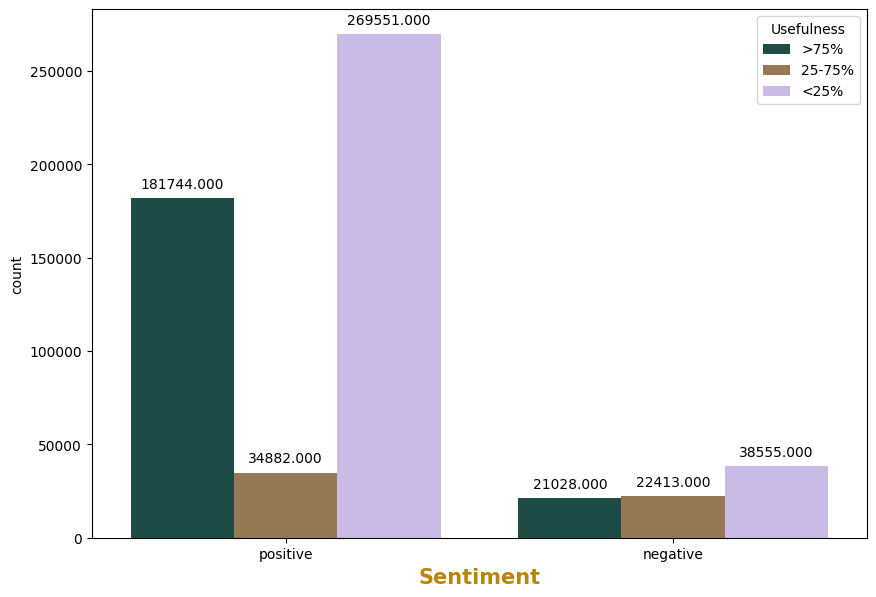

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
ax=sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"],hue_order=['>75%', '25-75%', '<25%'], data=text,palette='cubehelix')
ax.set_xlabel('Sentiment',fontsize=15,fontweight='bold',color='darkgoldenrod')
plt.xlabel('Sentiment')
add_value_labels(ax)
plt.show()

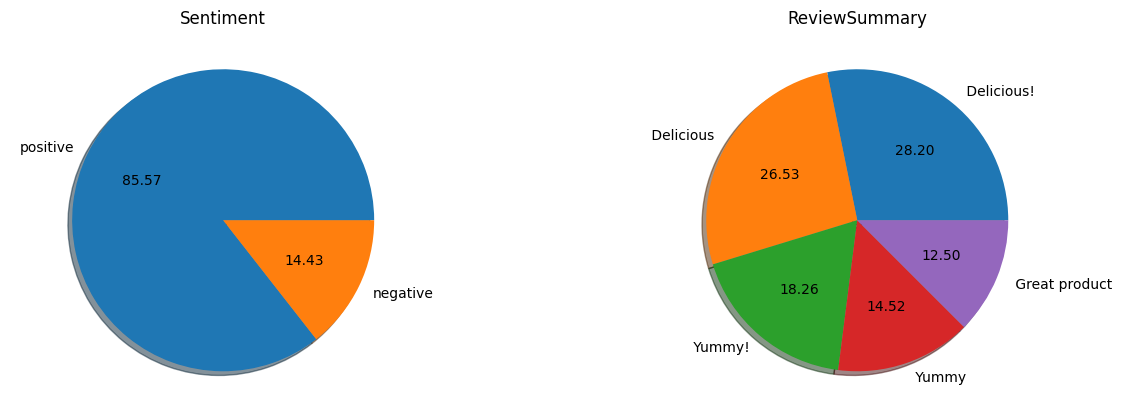

In [38]:
fig,axes=plt.subplots(1,2,figsize=(15,5),dpi=100)
text['Sentiment'].value_counts()[0:5].plot(kind='pie',ax=axes[0],ylabel=' ',autopct='%.2f',shadow=True)
axes[0].title.set_text('Sentiment')
text['ReviewSummary'].value_counts()[0:5].plot(kind='pie',ax=axes[1],ylabel=' ',autopct='%.2f',shadow=True)
axes[1].title.set_text('ReviewSummary')

In [ ]:
pos = text.loc[text['Sentiment'] == 'positive']
pos = pos[0:50]

neg = text.loc[text['Sentiment'] == 'negative']
neg = neg[0:50]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in text["ReviewSummary"]:
        text1 = str(val).lower()
        tokens = []
        tokens = word_tokenize(text1)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [ ]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

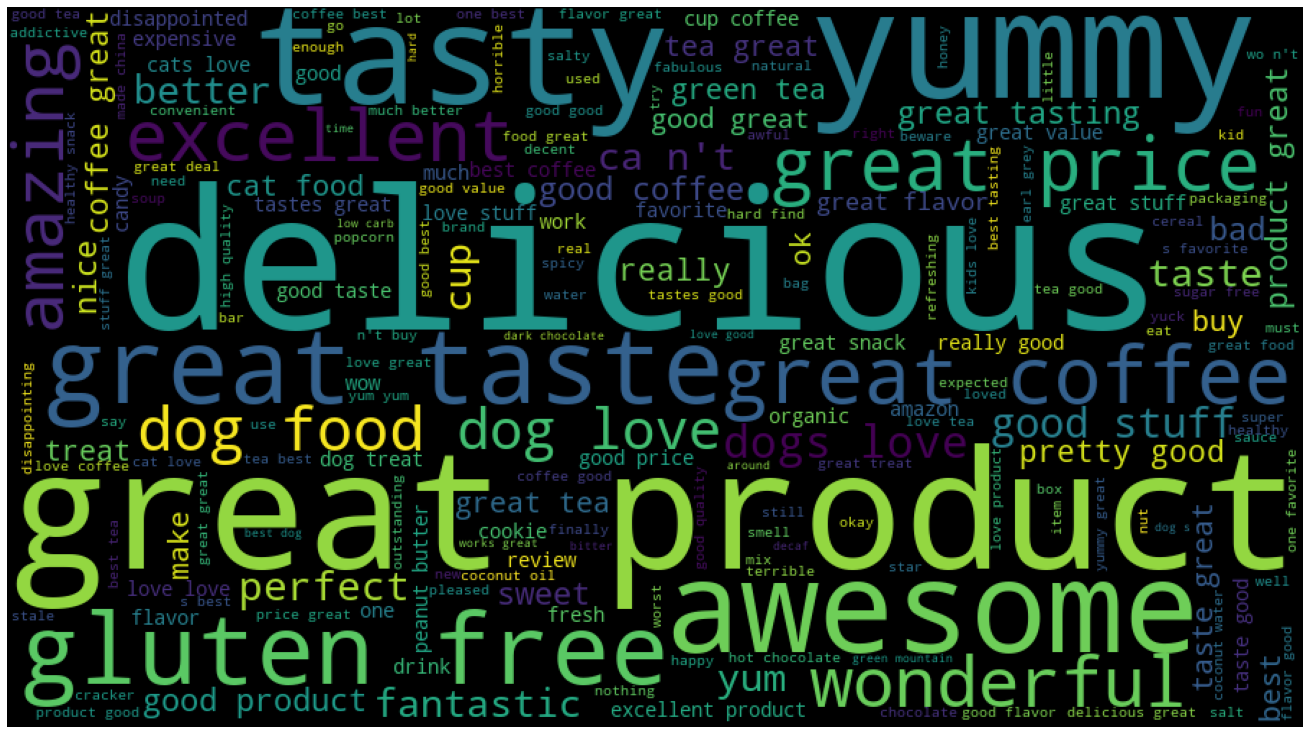

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

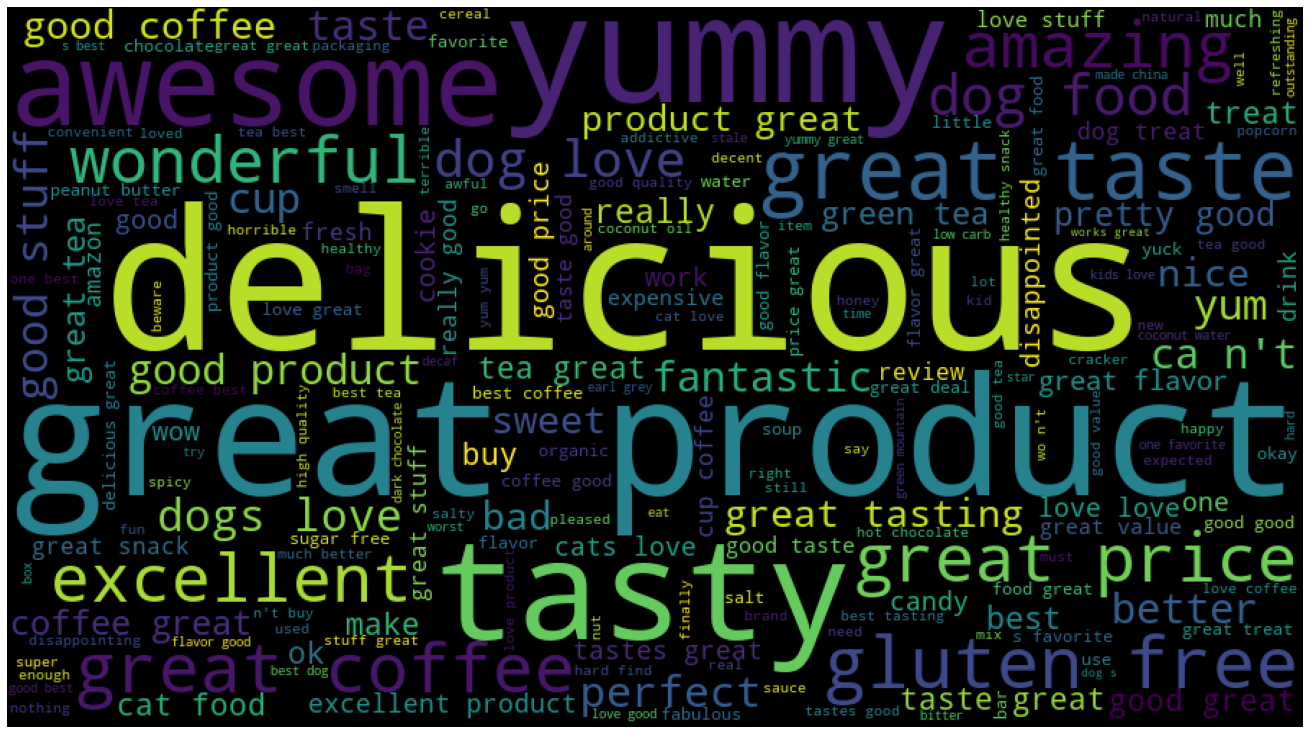

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

In [16]:
text.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,Sentiment,Usefulness
0,B002YLGA0W,ATLP39IAQU6MN,Ronnie S.,2,2,3,2011-06-04,Good but there's so much of it!!!,"Text: The taste of this corn is fine. However,...",100,positive,>75%
1,B0025WGHEE,A1R7I9VX8M5Y3V,"Neil S. Majd ""Neil""",1,2,5,2010-07-22,EXCELLENT!,Text: This is a great product. You can make yo...,50,positive,25-75%
2,B0029I6PJ6,A3KNVED193ME7,ben,0,0,5,2012-08-25,1000 times better than normal,"Text: this is an incredibly good soda, and is ...",0,positive,<25%
3,B000OH57ZW,A24PZR4W555WQI,D. Saldarriaga,0,0,5,2011-01-10,My dogs love Wellness,Text: My dogs and I love this food. They never...,0,positive,<25%
4,B0048IFP3W,A166KL32BGCSB0,Randy Haldeman,1,1,5,2012-01-31,Nectar of the gods,Text: I've been drinking one Guayaki Herba Mat...,100,positive,>75%


In [27]:
num=text.select_dtypes(include='number')
cat=text.select_dtypes(exclude='number').drop(['ProductId','UserId','ProfileName','Time'],axis=1)


In [28]:
cat.head()

,ReviewSummary,ReviewText,Sentiment,Usefulness
0,Good but there's so much of it!!!,"Text: The taste of this corn is fine. However,...",positive,>75%
1,EXCELLENT!,Text: This is a great product. You can make yo...,positive,25-75%
2,1000 times better than normal,"Text: this is an incredibly good soda, and is ...",positive,<25%
3,My dogs love Wellness,Text: My dogs and I love this food. They never...,positive,<25%
4,Nectar of the gods,Text: I've been drinking one Guayaki Herba Mat...,positive,>75%


In [29]:
num.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Helpfulness
0,2,2,3,100
1,1,2,5,50
2,0,0,5,0
3,0,0,5,0
4,1,1,5,100


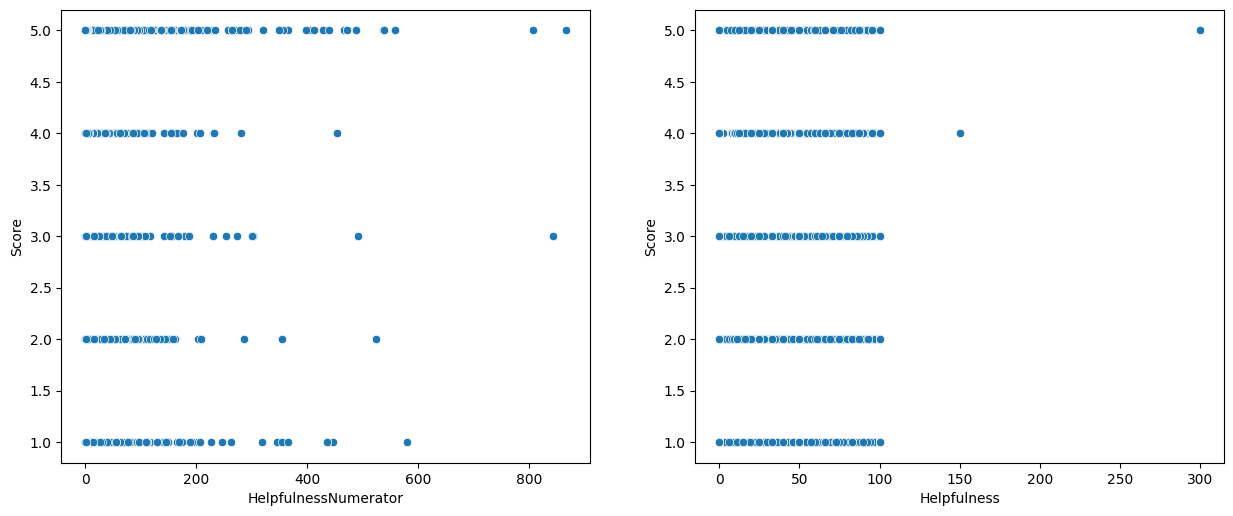

In [30]:
fig,axes=plt.subplots(1,2,figsize=(15,6),dpi=100)
sns.scatterplot(x=text['HelpfulnessNumerator'],y=text['Score'],data=text,ax=axes[0])
sns.scatterplot(x=text['Helpfulness'],y=text['Score'],data=text,ax=axes[1])
plt.show()

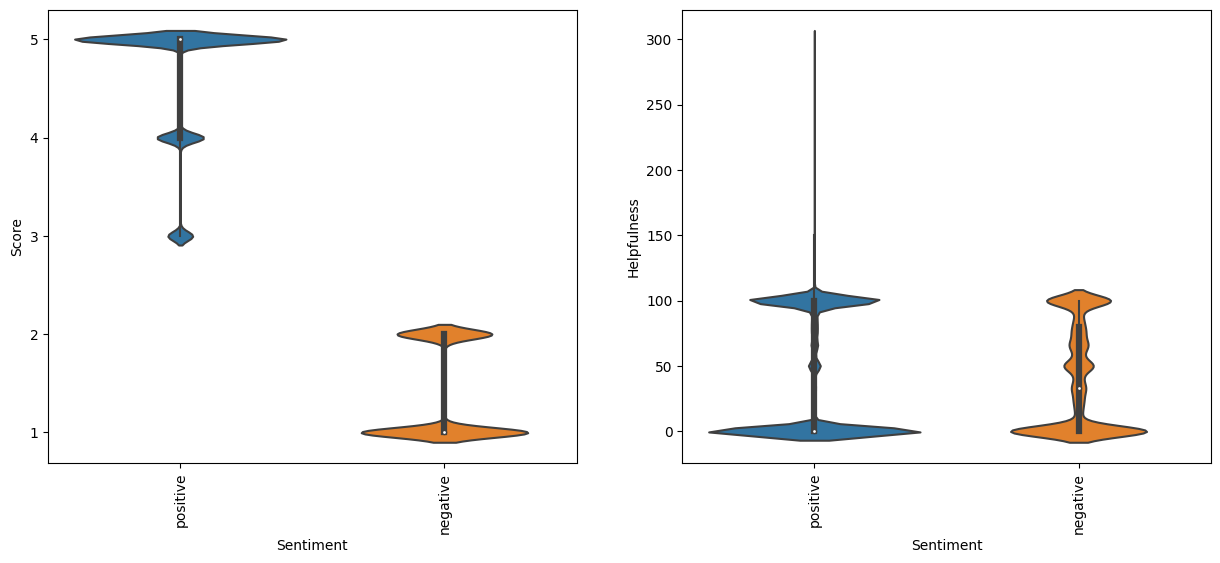

In [11]:
fig,axes=plt.subplots(1,2,figsize=(15,6),dpi=100)
sns.violinplot(x=text['Sentiment'],y=text['Score'],data=text,ax=axes[0])
sns.violinplot(x=text['Sentiment'],y=text['Helpfulness'],data=text)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

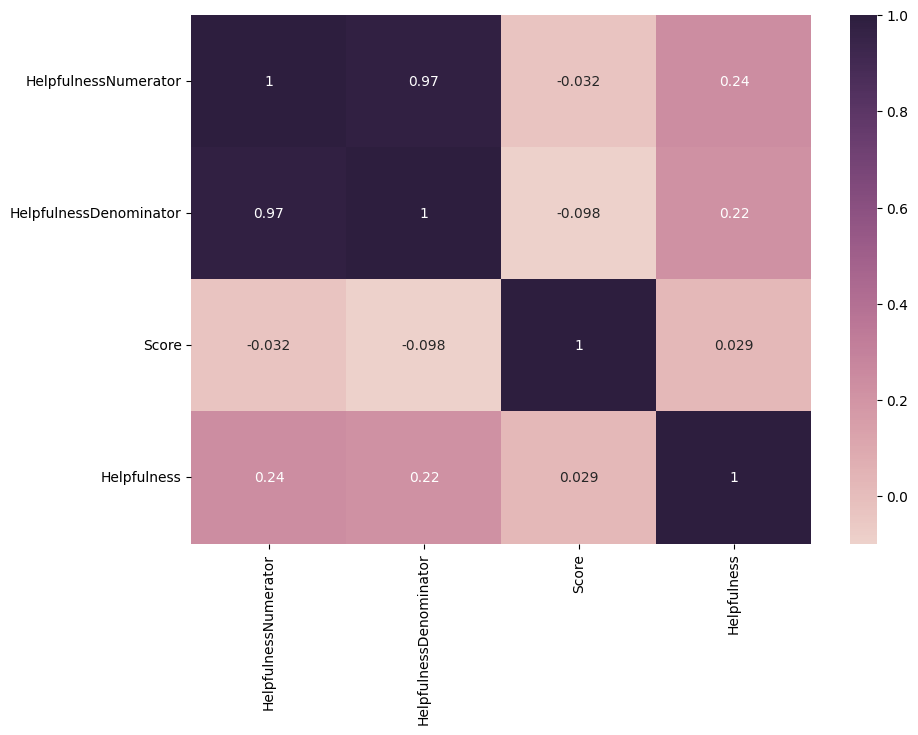

In [16]:
plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(text.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

<Figure size 6000x2000 with 0 Axes>

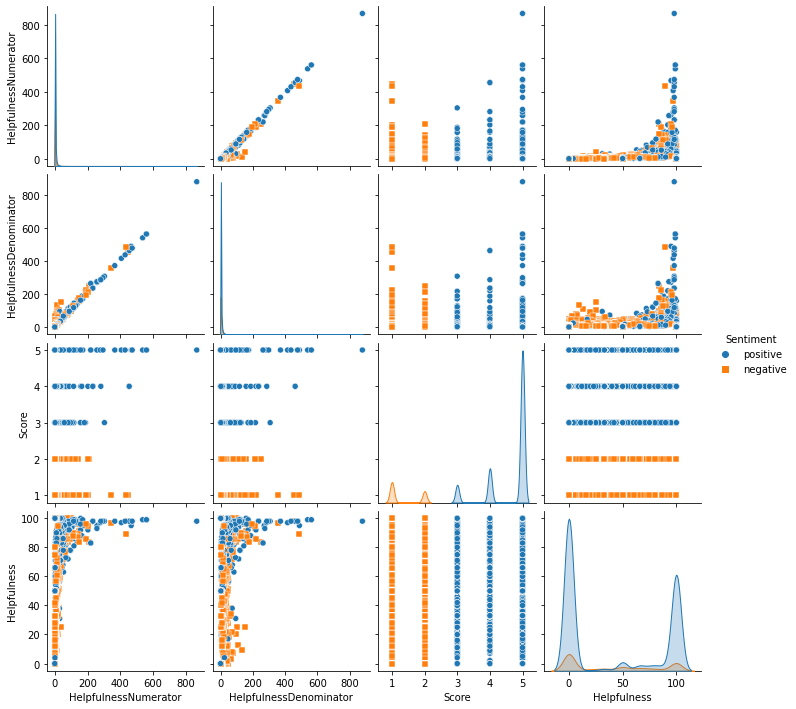

In [50]:
plt.figure(figsize=(30,10),dpi=200)
sns.pairplot(data=text[0:150000],hue='Sentiment',markers=["o", "s"])
plt.show()